# COVID19 Insight

## Use Google Trends API to create:
### - a data table
### - an insights narrative
### - to help communicate what you believe to be important information

In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


# Exploring NYTimes dataset
#### Source: https://github.com/nytimes/covid-19-data

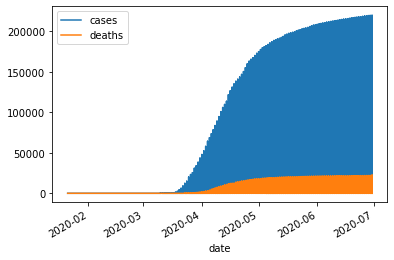

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

nytimes_2020_Jan_to_Jun = pd.read_csv (r'Data/NYTimes/us-counties-2020-Jan-Jun.txt')
nytimes_2020_Jan_to_Jun.to_csv (r'Data/NYTimes/us-counties-2020-Jan-Jun.csv', index=None)
nytimes_2020_Jan_to_Jun

nytimes_2020_Jan_to_Jun = nytimes_2020_Jan_to_Jun.drop(['county','fips'], axis=1)

nytimes_2020_Jan_to_Jun['date'] = pd.to_datetime(nytimes_2020_Jan_to_Jun["date"], infer_datetime_format=True)
nytimes_2020_Jan_to_Jun['date']

nytimes_2020_Jan_to_Jun['cases'].sum()

nytimes_2020_Jan_to_Jun['deaths'].sum()

nytimes_2020_Jan_to_Jun.plot(x='date', kind = 'line', use_index=True)
plt.show()

In [15]:
nytimes_2022_Jan_to_May = pd.read_csv (r'Data/NYTimes/us-counties-2022-Jan-May.txt')
nytimes_2022_Jan_to_May.to_csv (r'Data/NYTimes/us-counties-2022-Jan-May.csv', index=None)
nytimes_2022_Jan_to_May

nytimes_2022_Jan_to_May = nytimes_2022_Jan_to_May.drop(['county','fips'], axis=1)

nytimes_2022_Jan_to_May['date'] = pd.to_datetime(nytimes_2022_Jan_to_May["date"], infer_datetime_format=True)
nytimes_2022_Jan_to_May['date']

nytimes_2022_Jan_to_May['cases'].sum()

nytimes_2022_Jan_to_May['deaths'].sum()

nytimes_2022_Jan_to_May.plot(x='date', kind = 'line', use_index=True)
plt.show()

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0
...,...,...,...,...,...,...
422943,2022-05-10,Sweetwater,Wyoming,56037.0,11088,126.0
422944,2022-05-10,Teton,Wyoming,56039.0,10074,16.0
422945,2022-05-10,Uinta,Wyoming,56041.0,5643,39.0
422946,2022-05-10,Washakie,Wyoming,56043.0,2358,44.0


# Exploring pytrends

In [49]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["/m/01cpyy","covid symptoms","covid cases","unemployment benefits","covid vaccine"]
pytrends.build_payload(kw_list, cat=0, timeframe='2022-01-01 2022-05-11', geo='US', gprop='')

### Interest Over Time

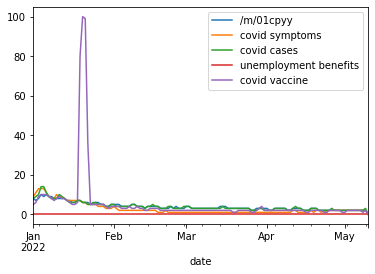

In [51]:
interest = pytrends.interest_over_time()
interest

interest.plot(kind = 'line', use_index=True)
#interest.plot(y='covid deaths', kind = 'line', use_index=True)
#interest.plot(y='covid cases', kind = 'line', use_index=True)
plt.show()

### Historical Hourly Interest

In [34]:
h_interest = pytrends.get_historical_interest(kw_list, year_start=2022, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=5, day_end=11, hour_end=0, cat=0, geo='US', gprop='', sleep=0)

h_interest.plot(kind = 'line', use_index=True)
plt.show()

### Interest by Region

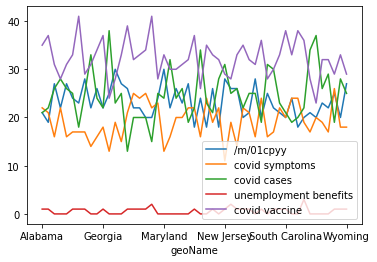

In [52]:
r_interest = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=True)
r_interest

r_interest.plot(kind = 'line', use_index=True)
plt.show()

### Trending search

In [40]:
trending_search = pytrends.trending_searches(pn='united_states')
trending_search

trending_search.plot(kind = 'bar', use_index=True)
plt.show()

,0
0,Suns
1,Inflation
2,Trevor Strnad
3,St. Louis Blues
4,Chelsea
5,Mike Tyson
6,Wolves vs Man City
7,Tampa Bay Lightning
8,Zara Phythian
9,Zac Efron


### Realtime search trends

In [54]:
realtime_trends = pytrends.realtime_trending_searches(pn='US')
realtime_trends

,title,entityNames
0,"Boston Celtics, Milwaukee Bucks, Giannis Antet...","[Boston Celtics, Milwaukee Bucks, Giannis Ante..."
1,"New York Rangers, Pittsburgh Penguins, Nationa...","[New York Rangers, Pittsburgh Penguins, Nation..."
2,"Blizzard Entertainment, Battle.net, Diablo, Ov...","[Blizzard Entertainment, Battle.net, Diablo, O..."
3,"Laguna Niguel, Wildfire, Orange County, Aliso ...","[Laguna Niguel, Wildfire, Orange County, Aliso..."
4,"Severe weather, Tornado, Minnesota, Tornado wa...","[Severe weather, Tornado, Minnesota, Tornado w..."
...,...,...
84,"Ben Simmons, Brooklyn Nets, Philadelphia 76ers...","[Ben Simmons, Brooklyn Nets, Philadelphia 76er..."
85,"Goop, Gwyneth Paltrow, Alpaca","[Goop, Gwyneth Paltrow, Alpaca]"
86,"Detroit Tigers, Oakland Athletics, MLB","[Detroit Tigers, Oakland Athletics, MLB]"
87,"Mankato, Minnesota","[Mankato, Minnesota]"


### Top Charts*

In [60]:
top_charts = pytrends.top_charts(2020, hl='en-US', tz=300, geo='US')
top_charts

,title,exploreQuery
0,Election results,
1,Coronavirus,
2,Kobe Bryant,
3,Coronavirus update,
4,Coronavirus symptoms,
5,Zoom,
6,Who is winning the election,
7,Naya Rivera,
8,Chadwick Boseman,
9,PlayStation 5,PS5


### Related topics

In [46]:
related_topics = pytrends.related_topics()
related_topics

{}

## Using pytrends to find an encoded topic

In [77]:
covid_vaccine = pytrends.suggestions('covid vaccine')
covid_vaccine

[{'mid': '/g/11j8_9sv06', 'title': 'COVID-19 vaccine', 'type': 'Vaccine'},
 {'mid': '/g/11lgrt_kcf', 'title': 'BNT162b2', 'type': 'Vaccine'},
 {'mid': '/g/11lll849zh', 'title': 'Nuvaxovid', 'type': 'Vaccine'},
 {'mid': '/g/11ll0qhr92', 'title': 'Ad26.COV2.S', 'type': 'Vaccine'},
 {'mid': '/g/11mtfzp621', 'title': 'AZD1222', 'type': 'Vaccine'}]

In [78]:
facemask = pytrends.suggestions('facemask')
facemask

[{'mid': '/m/0hzqk8z', 'title': 'Face mask', 'type': 'Topic'},
 {'mid': '/m/07cs8z',
  'title': 'Brian Baldinger',
  'type': 'American football offensive lineman'},
 {'mid': '/g/11n2b_zsts',
  'title': '2021 CDU/CSU Facemask Scandal',
  'type': 'Topic'}]